In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linregress
from scipy.stats import linregress
import gmaps
import requests

from config import g_key

In [3]:
# Create a set of random lat and long combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_longs)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

broome au
mahebourg mu
san cristobal ec
ushuaia ar
lavrentiya ru
mount isa au
svetlogorsk ru
liberty us
bluff nz
shenjiamen cn
cape town za
novovasylivka ua
bandarbeyla so
east london za
butaritari ki
amderma ru
albany au
castro cl
sobolevo ru
nome us
tuktoyaktuk ca
jamestown sh
andenes no
vaitupu wf
tautira pf
urengoy ru
albany au
anloga gh
yangambi cd
illoqqortoormiut gl
georgetown sh
rikitea pf
bluff nz
severo-kurilsk ru
hilo us
cape town za
fukue jp
amderma ru
carnarvon au
taolanaro mg
katsuura jp
bethel us
nova russas br
rikitea pf
barentsburg sj
samusu ws
yellowknife ca
ushuaia ar
valparaiso cl
mecca sa
lolua tv
albany au
urumqi cn
new norfolk au
mar del plata ar
ocos gt
cabo san lucas mx
eyl so
hobart au
rikitea pf
bluff nz
hermanus za
port alfred za
jumla np
yellowknife ca
dunn us
hobart au
acarau br
saleaula ws
cape town za
rikitea pf
illoqqortoormiut gl
kloulklubed pw
ushuaia ar
sibolga id
taolanaro mg
axim gh
taolanaro mg
ponta do sol pt
ponta do sol pt
puerto ayora ec
tuata

In [6]:
# create a list for holding the cities.
cities = []
#identify the nearest city for each lat long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique then we will at it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
cities

['broome',
 'mahebourg',
 'san cristobal',
 'ushuaia',
 'lavrentiya',
 'mount isa',
 'svetlogorsk',
 'liberty',
 'bluff',
 'shenjiamen',
 'cape town',
 'novovasylivka',
 'bandarbeyla',
 'east london',
 'butaritari',
 'amderma',
 'albany',
 'castro',
 'sobolevo',
 'nome',
 'tuktoyaktuk',
 'jamestown',
 'andenes',
 'vaitupu',
 'tautira',
 'urengoy',
 'anloga',
 'yangambi',
 'illoqqortoormiut',
 'georgetown',
 'rikitea',
 'severo-kurilsk',
 'hilo',
 'fukue',
 'carnarvon',
 'taolanaro',
 'katsuura',
 'bethel',
 'nova russas',
 'barentsburg',
 'samusu',
 'yellowknife',
 'valparaiso',
 'mecca',
 'lolua',
 'urumqi',
 'new norfolk',
 'mar del plata',
 'ocos',
 'cabo san lucas',
 'eyl',
 'hobart',
 'hermanus',
 'port alfred',
 'jumla',
 'dunn',
 'acarau',
 'saleaula',
 'kloulklubed',
 'sibolga',
 'axim',
 'ponta do sol',
 'puerto ayora',
 'tuatapere',
 'longyearbyen',
 'mataura',
 'esperance',
 'yulara',
 'qaanaaq',
 'saint george',
 'atar',
 'charlestown',
 'noumea',
 'bredasdorp',
 'abnub',
 

In [8]:
#import the requests library
import requests
#import the api key
from config import weather_api_key

In [9]:
#starting URL for weather map api call.(from website)
#wurl = "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid="+ weather_api_key
#print(wurl)

In [10]:
# Starting URL for Weather Map API Call.(from module)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b11ddb4c8cc0761bb3d8b478bdda89d8


In [11]:
# create an empty list to hold weather data
city_data = []
#print the beginning of the loging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counter
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | san cristobal
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | svetlogorsk
Processing Record 8 of Set 1 | liberty
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | shenjiamen
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | novovasylivka
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | sobolevo
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | jamestown
Proce

In [12]:
len(city_data)

563

In [13]:
#turn series into data frame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#reorder columns
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2022-02-27 16:38:58,42.2506,-75.8330,33.44,73,9,15.30
1,Mahebourg,MU,2022-02-27 16:38:07,-20.4081,57.7000,80.26,89,40,3.44
2,San Cristobal,VE,2022-02-27 16:38:59,7.7669,-72.2250,84.79,43,78,3.31
3,Ushuaia,AR,2022-02-27 16:37:49,-54.8000,-68.3000,43.05,89,97,3.38
4,Lavrentiya,RU,2022-02-27 16:38:59,65.5833,-171.0000,29.19,94,100,16.44
...,...,...,...,...,...,...,...,...,...
558,Buala,SB,2022-02-27 16:53:22,-8.1450,159.5921,78.35,87,100,6.85
559,Harper,LR,2022-02-27 16:53:22,4.3750,-7.7169,83.73,70,62,10.29
560,Ondangwa,NA,2022-02-27 16:53:22,-17.9167,15.9500,84.18,39,60,2.55
561,Puerto El Triunfo,SV,2022-02-27 16:53:23,13.2833,-88.5500,87.40,45,51,8.14


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#Extract relevant fields from the Data Frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

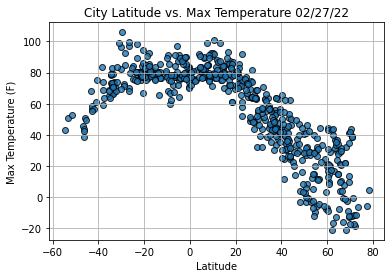

In [15]:
#scatter plot - Lat vs max temp
plt.scatter(lats, 
            max_temps, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()


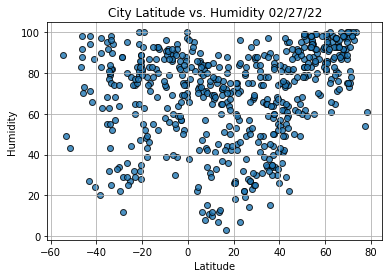

In [16]:
#scatter plot - Lat vs humidity
plt.scatter(lats, 
            humidity, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

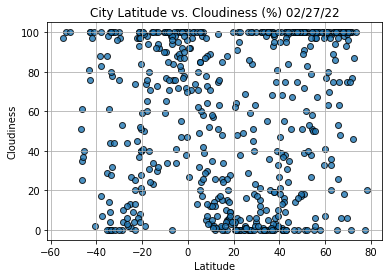

In [17]:
#scatter plot - Lat vs cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

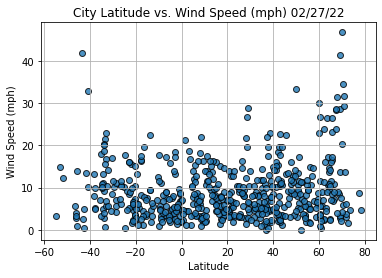

In [18]:
#scatter plot - Lat vs windspeed
plt.scatter(lats, 
            wind_speed, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2022-02-27 16:39:01
Lat                      -33.0153
Lng                       27.9116
Max Temp                    73.96
Humidity                       82
Cloudiness                     78
Wind Speed                  16.84
Name: 13, dtype: object

In [21]:
#pulling lats greater than 0 filter 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2022-02-27 16:38:58,42.2506,-75.8330,33.44,73,9,15.30
2,San Cristobal,VE,2022-02-27 16:38:59,7.7669,-72.2250,84.79,43,78,3.31
4,Lavrentiya,RU,2022-02-27 16:38:59,65.5833,-171.0000,29.19,94,100,16.44
6,Svetlogorsk,BY,2022-02-27 16:38:59,52.6333,29.7333,28.83,79,100,11.32
7,Liberty,US,2022-02-27 16:39:00,31.8335,-81.5004,70.59,74,100,5.08


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

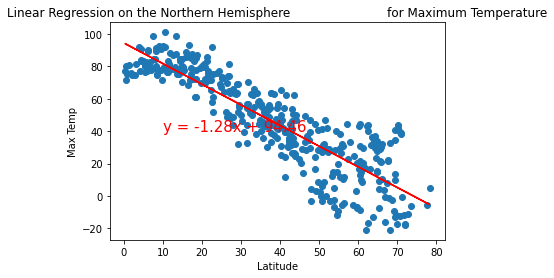

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

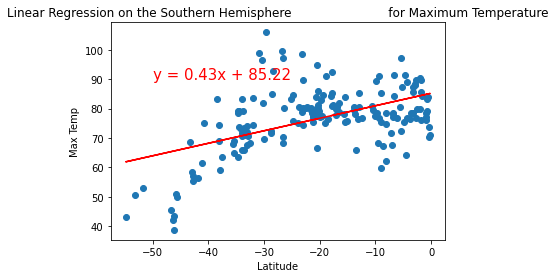

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

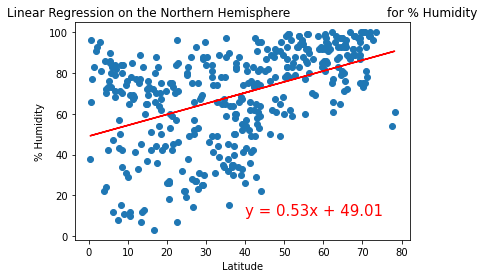

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

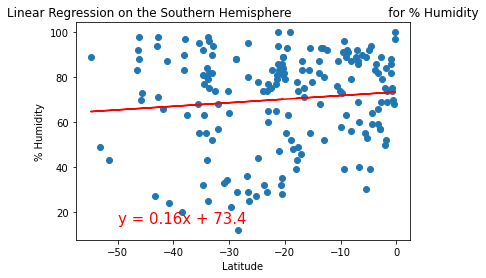

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

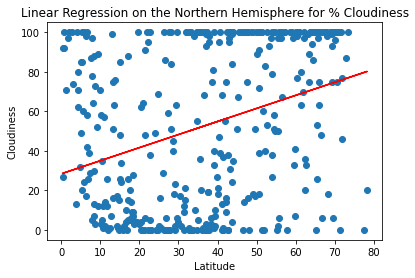

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       'Cloudiness',(-50,15))

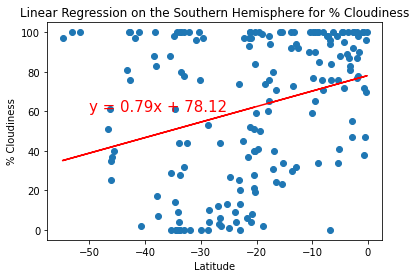

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

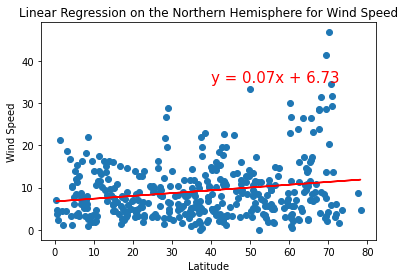

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

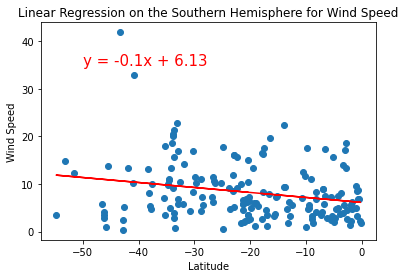

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [3]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [21]:
#heatmap temps 
# assign the location to an array for lat long pairs
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
#(see below for alternative using list comprehension)
# for temp in max_temp:
#    temps.append(max(temp, 0))

# assign figure variable (adding the geographic center of the earth -- 30.0° N and 31.0°E )
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=2.5)
#assign the heatmap vairable (see below for alternative using list comprehension)
#heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# this replaces the previous wariable assignment + for loop above
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp],dissipating=False, max_intensity=300, point_radius=4)
#ass the heatmap layer
fig.add_layer(heat_layer)
#call the fig to plot the data
fig


Figure(layout=FigureLayout(height='420px'))

In [48]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=2.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=2.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [50]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=2.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [32]:
# Filter the dataset to find the cities that fit the criteria (.dropna is droping ciies with NAs in them).
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)].dropna()
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Mahebourg,MU,2022-02-27 16:38:07,-20.4081,57.7000,80.26,89,40,3.44
2,2,San Cristobal,VE,2022-02-27 16:38:59,7.7669,-72.2250,84.79,43,78,3.31
5,5,Mount Isa,AU,2022-02-27 16:38:59,-20.7333,139.5000,83.97,32,8,6.91
10,10,Cape Town,ZA,2022-02-27 16:34:03,-33.9258,18.4232,83.08,43,0,9.22
12,12,Bandarbeyla,SO,2022-02-27 16:39:00,9.4942,50.8122,77.52,74,12,16.37
14,14,Butaritari,KI,2022-02-27 16:39:01,3.0707,172.7902,81.70,81,74,18.63
16,16,Castro,BR,2022-02-27 16:39:01,-24.7911,-50.0119,84.54,44,27,0.45
22,22,Tautira,PF,2022-02-27 16:39:03,-17.7333,-149.1500,80.82,78,98,16.35
24,24,Anloga,GH,2022-02-27 16:39:03,5.7947,0.8973,82.49,80,24,15.30
25,25,Yangambi,CD,2022-02-27 16:39:04,0.8102,24.4336,75.52,77,92,2.46


In [33]:
preferred_cities_df.notnull().sum()

City_ID       187
City          187
Country       187
Date          187
Lat           187
Lng           187
Max Temp      187
Humidity      187
Cloudiness    187
Wind Speed    187
dtype: int64

In [36]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Mahebourg,MU,80.26,-20.4081,57.7000,
2,San Cristobal,VE,84.79,7.7669,-72.2250,
5,Mount Isa,AU,83.97,-20.7333,139.5000,
10,Cape Town,ZA,83.08,-33.9258,18.4232,
12,Bandarbeyla,SO,77.52,9.4942,50.8122,
14,Butaritari,KI,81.70,3.0707,172.7902,
16,Castro,BR,84.54,-24.7911,-50.0119,
22,Tautira,PF,80.82,-17.7333,-149.1500,
24,Anloga,GH,82.49,5.7947,0.8973,
25,Yangambi,CD,75.52,0.8102,24.4336,


In [37]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [46]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
   
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [51]:
# add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=2.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)
#call the figure to plot the data 
fig


Figure(layout=FigureLayout(height='420px'))

In [56]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]


In [60]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))